# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.environ['NEPTUNE_API_TOKEN']="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI5NDc0ZmNhNi0wODFlLTRhYTktYjgwZS01MWJkMDMxNWJhNTAifQ=="
os.environ['NEPTUNE_PROJECT']="guilhermemg/icao-nets-training-2"
os.environ['NEPTUNE_NOTEBOOK_ID']="98a391a1-c710-40bd-aaf4-42c31862cbbe"
os.environ['NEPTUNE_NOTEBOOK_PATH']="training/exec_nas_experiment.ipynb"

In [3]:
import os
# disable tensorflow log level infos
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # show only errors

import sys
import pandas as pd

if '..' not in sys.path:
    sys.path.insert(0, '..')

In [4]:
from src.m_utils import constants as cts
from src.base.data_loaders.data_loader import DLName
from src.base.gt_loaders.gt_names import GTName
from src.exp_runner import ExperimentRunner

from src.base.experiment.dataset.dataset import Dataset
from src.base.experiment.evaluation.model_evaluator import DataSource, DataPredSelection
from src.base.experiment.training.base_models import BaseModel
from src.base.experiment.training.optimizers import Optimizer

from src.m_utils.stl_approach import STLApproach
from src.m_utils.mtl_approach import MTLApproach
from src.m_utils.nas_mtl_approach import NAS_MTLApproach

from src.nas.v3.nas_algorithm import NASAlgorithm
from src.nas.v3.mlp_search_space import MLPSearchSpaceIndicator

 ==> Restrict GPU memory growth: True


../src/base/experiment/evaluation/model_evaluator.py:10: NeptuneDeprecationWarning: You're importing the Neptune client library via the deprecated `neptune.new` module, which will be removed in a future release. Import directly from `neptune` instead.
  from neptune.new.types import File


# Start Network Runner

In [5]:
DATASET = Dataset.MNIST
APPROACH = NAS_MTLApproach.APPROACH_3

kwargs = { 
    'use_neptune': True,
    'exp_params' : {
        'name': 'NAS experiment',
        'description': 'NAS with Approach 3 - Testing parametrization of n_convs',
        'tags': [f'{DATASET.value["name"]}', 'nas', 'nas_approach_3_v3', 'final_experiments_2'],
        'src_files': ["../src/**/*.py"]
    },
    'properties': {
        'approach': APPROACH,
        'dataset': DATASET,
        'tasks': DATASET.value['tasks'],
        'balance_input_data': False,
        'train_model': True,
        'save_trained_model': True,
        'exec_nas': True,
        'orig_model_experiment_id': '',
        'sample_training_data': False,
        'sample_prop': 1,
    },
    'nas_params': {
        'architecture_training_epochs': 5,     # n_epochs for training proposed architecture
        'total_num_proposed_architectures': 30,
        'nas_algorithm': NASAlgorithm.RL,
        'nas_search_space': MLPSearchSpaceIndicator.SS_2
    },
    'controller_params': {
        'controller_max_proposed_arch_len': 8,   # == sss = 5 / tss = 6 / max_len = 8 (n_denses+n_convs)
        'controller_classes': MLPSearchSpaceIndicator.SS_2.value['n_classes'],    # == n_candidates ==> sss = 8 / n_operations ==> tss = 5 / classes = 8 (n_denses+n_convs)
        'controller_lstm_dim': 100,
        'controller_optimizer': Optimizer.ADAM,
        'controller_learning_rate': 0.006,
        'controller_decay': 0.0,
        'controller_momentum': 0.0,
        'controller_use_predictor': False,
        'controller_loss_alpha': 0.3,  # 0.9, 0.6, 0.3
        'controller_training_epochs': 20,
        'controller_batch_size': 10
    },
    'mlp_params': {
        'mlp_base_model': BaseModel.MOBILENET_V2,
        'mlp_n_epochs': 50,
        'mlp_batch_size': 64,
        'mlp_early_stopping': 50,
        'mlp_optimizer': Optimizer.ADAMAX,
        'mlp_learning_rate': 1e-3,
        'mlp_decay': 0.0,
        'mlp_momentum': 0.0,
        'mlp_dropout': 0.3,
        'mlp_loss_function': 'sparse_categorical_crossentropy',
        'mlp_one_shot': False
    }
}


runner = ExperimentRunner(**kwargs)

-------------------- Init ExperimentRunner -------------------
---------------------------
Parent Process ID: 10755
Process ID: 161521
---------------------------
-----
Use Neptune:  True
-----
-------------------
Args: 
{'controller_params': {'controller_batch_size': 10,
                       'controller_classes': 8,
                       'controller_decay': 0.0,
                       'controller_learning_rate': 0.006,
                       'controller_loss_alpha': 0.3,
                       'controller_lstm_dim': 100,
                       'controller_max_proposed_arch_len': 8,
                       'controller_momentum': 0.0,
                       'controller_optimizer': <Optimizer.ADAM: 'Adam'>,
                       'controller_training_epochs': 20,
                       'controller_use_predictor': False},
 'exp_params': {'description': 'NAS with Approach 3 - Testing parametrization '
                               'of n_convs',
                'name': 'NAS experiment',


../src/m_utils/neptune_utils.py:27: NeptuneWarning: To avoid unintended consumption of logging hours during interactive sessions, the following monitoring options are disabled unless set to 'True' when initializing the run: 'capture_stdout', 'capture_stderr', and 'capture_hardware_metrics'.
  self.neptune_run = neptune.init_run(name=self.config_interp.exp_args['name'],


https://app.neptune.ai/guilhermemg/icao-nets-training-2/e/ICAO-492
----
Model path:  trained_model
----
Checking model existence locally...
Training a new model! Not checking model existence
----
------------------------------
Checking GPU availability
 ..GPU is available!
------------------------------


# Load Data

In [6]:
runner.load_training_data()

-------------------- load training data -------------------
Loading data
TrainData.shape: (48000, 11)
ValidationData.shape: (12000, 11)
TestData.shape: (10000, 11)
Data loaded


In [7]:
runner.sample_training_data()

-------------------- sample training data -------------------
Not applying subsampling in training data!


In [8]:
runner.train_data.head()

,img_name,n_0,n_1,n_2,n_3,n_4,n_5,n_6,n_7,n_8,n_9
0,/home/guilherme/data1/Dropbox/Link to Desktop/...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,/home/guilherme/data1/Dropbox/Link to Desktop/...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/home/guilherme/data1/Dropbox/Link to Desktop/...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/home/guilherme/data1/Dropbox/Link to Desktop/...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,/home/guilherme/data1/Dropbox/Link to Desktop/...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


runner.produce_fake_data()

# Data Generators

In [9]:
runner.setup_data_generators()

-------------------- setup data generators -------------------
Starting data generators
Found 48000 validated image filenames.
Found 12000 validated image filenames.
Found 10000 validated image filenames.
TOTAL: 70000

Logging class indices
 .. MTL model not logging class indices!

Using benchmarking dataset. Not logging class labels!


# Setup Experiment

In [10]:
runner.setup_experiment()

-------------------- create experiment -------------------
Setting up neptune experiment
Neptune experiment setup done!


# Labels Distribution

In [11]:
%%capture
runner.summary_labels_dist()

# Neural Architecture Search - v3

-------------------- run neural architecture search -------------------
 -- Using search space: {'name': 'ss_2', 'n_classes': 8}
 -- Using NAS algorithm: NASAlgorithm.RL

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      [(None, 1, 10)]           0         
_________________________________________________________________
rnn (RNN)                    (None, 1, 100)            44400     
_________________________________________________________________
main_output (Dense)          (None, 1, 8)              808       
Total params: 45,208
Trainable params: 45,208
Non-trainable params: 0
_________________________________________________________________
None
Model path:  trained_model
----
Checking model existence locally...
Training a new model! Not checking model existence
----
------------------------------
Checking GPU availability
 ..GPU is available!
---------

/home/guilherme/data2/anaconda3/envs/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_loss improved from 0.03224 to 0.01306, saving model to training/training_ckpt/best_model.hdf5

Epoch 00003: val_loss did not improve from 0.01306

Epoch 00004: val_loss improved from 0.01306 to 0.00753, saving model to training/training_ckpt/best_model.hdf5

Epoch 00005: val_loss did not improve from 0.00753
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
188/188 [==============================] - 11s 55ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00260 | EER_interp: 0.00230 | ACC: 0.99780
  Task  1: n_1             | EER_mean: 0.00160 | EER_interp: 0.00160 | ACC: 0.99840
  Task  2: n_2             | EER_mean: 0.00140 | EER_interp: 0.00110 | ACC: 0.99870
  Task  3: n_3             | EER_mean: 0.00260 | EER_interp: 0.00250 | ACC: 0.99740
  Task  4: n_4             | EER_mean: 0.00310 | EER_interp: 0.00320 | ACC: 0.99690
  Task  5: n_5             | EER_mean: 0.00190 | EER_interp: 0.00190 | ACC: 0.998

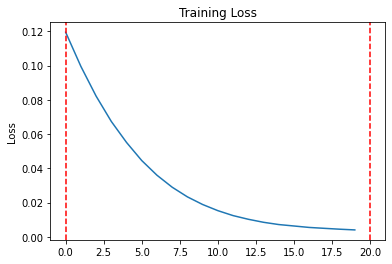

 ..Controller model trained!
  New Controller Epoch | Feedback ID: 11 | Feedback DNA: DNA([[2, 2, 2, 2], [1, 1, 1, 1]])
----------------------------------------------------------------------
------------------------------------------------------------
 -- Architecture 11: {'n_denses_0': 3, 'n_denses_1': 3, 'n_denses_2': 3, 'n_denses_3': 3, 'n_convs_0': 2, 'n_convs_1': 2, 'n_convs_2': 2, 'n_convs_3': 2}
Creating model...
Model created
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 6,321,236
  .. Trainable params: 4,063,252
  .. Non-trainable params: 2,257,984

Epoch 00001: val_loss improved from inf to 0.03291, saving model to training/training_ckpt/best_model.hdf5


/home/guilherme/data2/anaconda3/envs/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_loss improved from 0.03291 to 0.01073, saving model to training/training_ckpt/best_model.hdf5

Epoch 00003: val_loss did not improve from 0.01073

Epoch 00004: val_loss improved from 0.01073 to 0.00834, saving model to training/training_ckpt/best_model.hdf5

Epoch 00005: val_loss improved from 0.00834 to 0.00654, saving model to training/training_ckpt/best_model.hdf5
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
188/188 [==============================] - 11s 54ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00170 | EER_interp: 0.00120 | ACC: 0.99920
  Task  1: n_1             | EER_mean: 0.00200 | EER_interp: 0.00210 | ACC: 0.99800
  Task  2: n_2             | EER_mean: 0.00060 | EER_interp: 0.00070 | ACC: 0.99930
  Task  3: n_3             | EER_mean: 0.00240 | EER_interp: 0.00220 | ACC: 0.99790
  Task  4: n_4             | EER_mean: 0.00340 | EER_interp: 0.00320 | ACC: 0.99680
  Task  5: n_5       

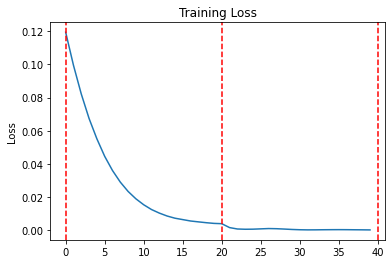

 ..Controller model trained!
  New Controller Epoch | Feedback ID: 21 | Feedback DNA: DNA([[4, 4, 3, 4], [2, 2, 2, 0]])
----------------------------------------------------------------------
------------------------------------------------------------
 -- Architecture 21: {'n_denses_0': 5, 'n_denses_1': 5, 'n_denses_2': 4, 'n_denses_3': 5, 'n_convs_0': 3, 'n_convs_1': 3, 'n_convs_2': 3, 'n_convs_3': 1}
Creating model...
Model created
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 6,414,612
  .. Trainable params: 4,156,628
  .. Non-trainable params: 2,257,984

Epoch 00001: val_loss improved from inf to 0.05615, saving model to training/training_ckpt/best_model.hdf5


/home/guilherme/data2/anaconda3/envs/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_loss improved from 0.05615 to 0.01421, saving model to training/training_ckpt/best_model.hdf5

Epoch 00003: val_loss improved from 0.01421 to 0.00727, saving model to training/training_ckpt/best_model.hdf5

Epoch 00004: val_loss improved from 0.00727 to 0.00630, saving model to training/training_ckpt/best_model.hdf5

Epoch 00005: val_loss improved from 0.00630 to 0.00579, saving model to training/training_ckpt/best_model.hdf5
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
188/188 [==============================] - 10s 50ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00020 | EER_interp: 0.00000 | ACC: 0.99980
  Task  1: n_1             | EER_mean: 0.00180 | EER_interp: 0.00200 | ACC: 0.99820
  Task  2: n_2             | EER_mean: 0.00080 | EER_interp: 0.00080 | ACC: 0.99920
  Task  3: n_3             | EER_mean: 0.00330 | EER_interp: 0.00280 | ACC: 0.99770
  Task  4: n_4             | EER_mean: 0.0051

In [12]:
best_arch = runner.run_neural_architecture_search_v3()

# Create Model with Best Architecture Found

In [13]:
runner.create_model(best_arch)

-------------------- create model -------------------
Creating model...
Model created


# Visualize Model

In [14]:
%%capture
runner.visualize_model(outfile_path=f"training/figs/nas/nas_model_{APPROACH.name}.png")

In [15]:
%%capture
runner.model_summary()

# Training Model

In [16]:
runner.train_model()

-------------------- train model -------------------
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 6,324,020
  .. Trainable params: 4,066,036
  .. Non-trainable params: 2,257,984
Epoch 1/50
750/750 [==============================] - 225s 293ms/step - loss: 0.0254 - n_0_loss: 0.0256 - n_1_loss: 0.0158 - n_7_loss: 0.0244 - n_4_loss: 0.0211 - n_2_loss: 0.0252 - n_3_loss: 0.0292 - n_5_loss: 0.0236 - n_6_loss: 0.0271 - n_8_loss: 0.0264 - n_9_loss: 0.0355 - n_0_accuracy: 0.9885 - n_1_accuracy: 0.9943 - n_7_accuracy: 0.9913 - n_4_accuracy: 0.9927 - n_2_accuracy: 0.9906 - n_3_accuracy: 0.9892 - n_5_accuracy: 0.9920 - n_6_accuracy: 0.9895 - n_8_accuracy: 0.9902 - n_9_accuracy: 0.9872 - val_loss: 0.0315 - val_n_0_loss: 0.0105 - val_n_1_loss: 0.0101 - val_n_7_loss: 0.0393 - val_n_4_loss: 0.0137 - val_n_2_loss: 0.0725 - val_n_3_loss: 0.0552 - val_n_5_loss: 0.0248 - val_n_6_loss: 0.0218 - val_n_8_loss: 0.0237 - val_n_9_loss: 0.0433 - val_n_0_accuracy: 0.9972 - v

/home/guilherme/data2/anaconda3/envs/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/50
750/750 [==============================] - 220s 294ms/step - loss: 0.0060 - n_0_loss: 0.0033 - n_1_loss: 0.0048 - n_7_loss: 0.0060 - n_4_loss: 0.0060 - n_2_loss: 0.0063 - n_3_loss: 0.0059 - n_5_loss: 0.0058 - n_6_loss: 0.0069 - n_8_loss: 0.0064 - n_9_loss: 0.0087 - n_0_accuracy: 0.9990 - n_1_accuracy: 0.9987 - n_7_accuracy: 0.9983 - n_4_accuracy: 0.9983 - n_2_accuracy: 0.9981 - n_3_accuracy: 0.9984 - n_5_accuracy: 0.9982 - n_6_accuracy: 0.9979 - n_8_accuracy: 0.9983 - n_9_accuracy: 0.9976 - val_loss: 0.0181 - val_n_0_loss: 0.0175 - val_n_1_loss: 0.0117 - val_n_7_loss: 0.0039 - val_n_4_loss: 0.0258 - val_n_2_loss: 0.0106 - val_n_3_loss: 0.0202 - val_n_5_loss: 0.0152 - val_n_6_loss: 0.0081 - val_n_8_loss: 0.0543 - val_n_9_loss: 0.0138 - val_n_0_accuracy: 0.9950 - val_n_1_accuracy: 0.9975 - val_n_7_accuracy: 0.9987 - val_n_4_accuracy: 0.9916 - val_n_2_accuracy: 0.9975 - val_n_3_accuracy: 0.9957 - val_n_5_accuracy: 0.9968 - val_n_6_accuracy: 0.9977 - val_n_8_accuracy: 0.9886 - v

# Plots

-------------------- draw training history -------------------


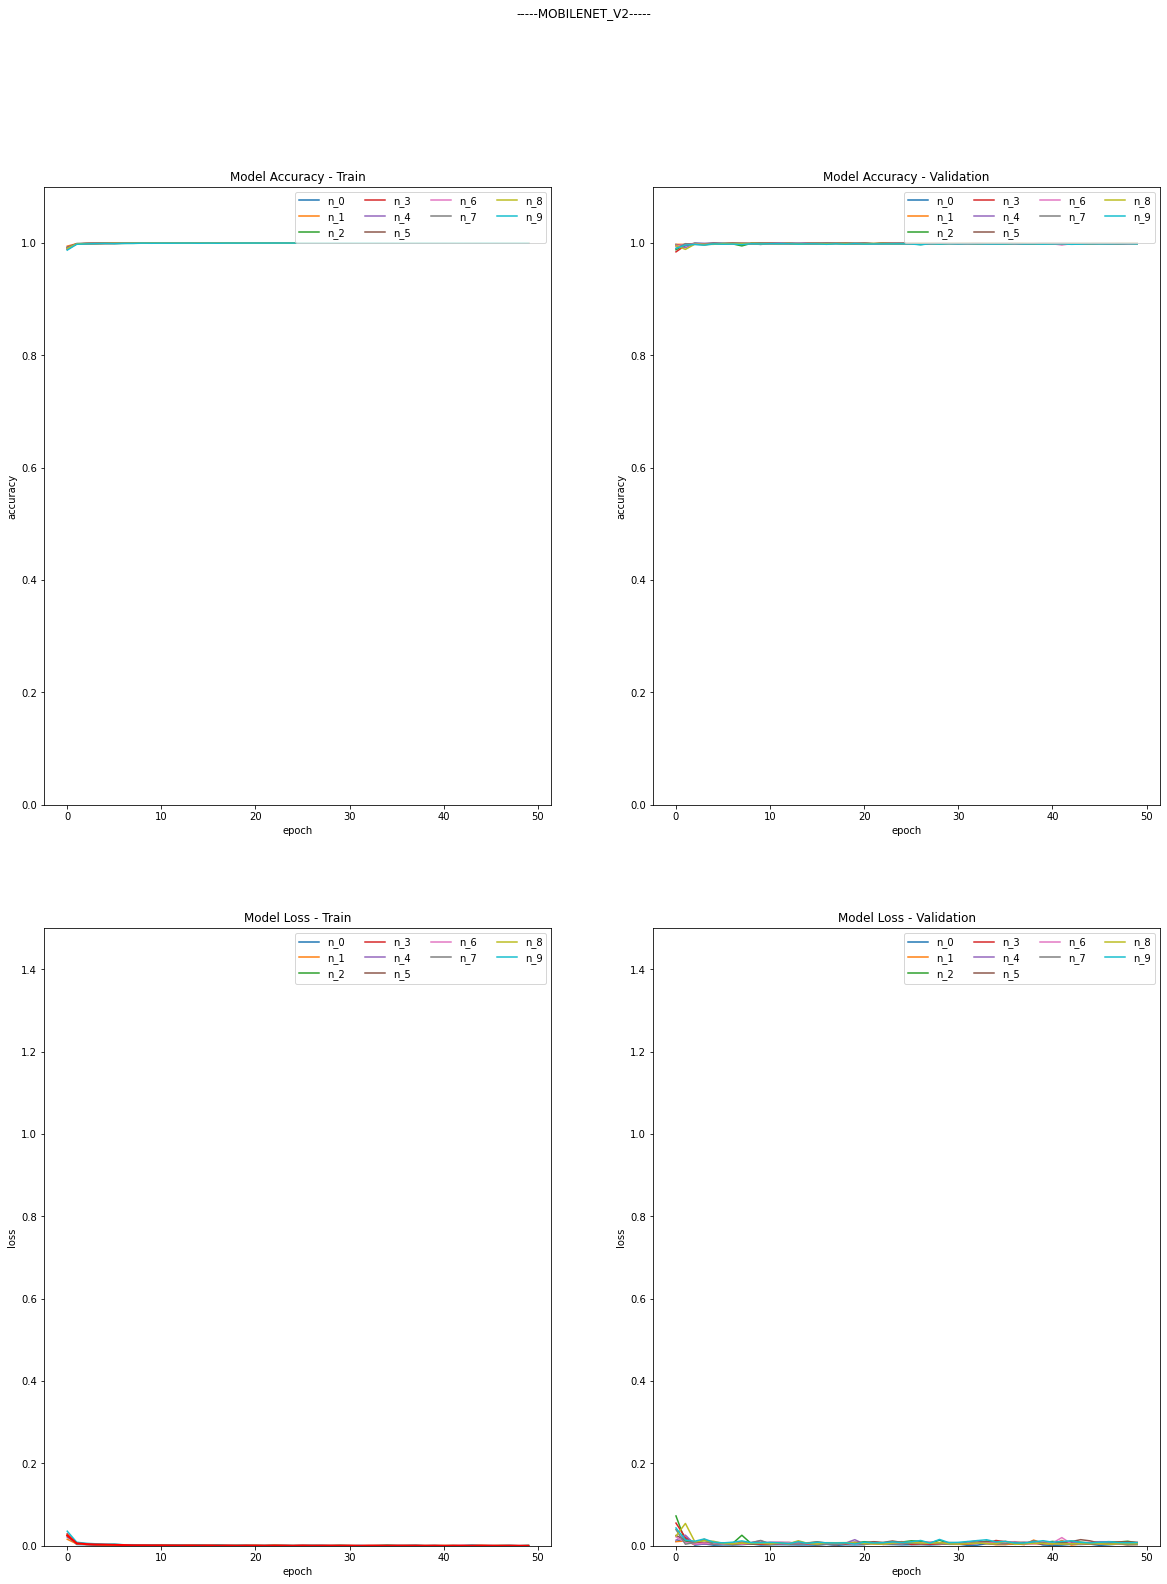

In [17]:
runner.draw_training_history()

# Load Best Model

In [18]:
runner.load_best_model()

-------------------- load best model -------------------
..Loading best model
..Checkpoint weights loaded


# Saving Trained Model

In [19]:
runner.save_model()

-------------------- save model -------------------
Saving model


/home/guilherme/data2/anaconda3/envs/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: trained_model/assets
..Model saved
...Model path: trained_model
Saving model to neptune
 ..Uploading file trained_model.zip
Model saved into Neptune
Saving process finished


# Test Trained Model

## Validation Split

In [20]:
runner.set_model_evaluator_data_src(DataSource.VALIDATION)
runner.test_model(verbose=False)

Testing Trained Model
Predicting labels....
188/188 [==============================] - 10s 51ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00080 | EER_interp: 0.00080 | ACC: 0.99920
  Task  1: n_1             | EER_mean: 0.00150 | EER_interp: 0.00110 | ACC: 0.99920
  Task  2: n_2             | EER_mean: 0.00130 | EER_interp: 0.00150 | ACC: 0.99870
  Task  3: n_3             | EER_mean: 0.00080 | EER_interp: 0.00070 | ACC: 0.99940
  Task  4: n_4             | EER_mean: 0.00170 | EER_interp: 0.00150 | ACC: 0.99870
  Task  5: n_5             | EER_mean: 0.00090 | EER_interp: 0.00080 | ACC: 0.99920
  Task  6: n_6             | EER_mean: 0.00330 | EER_interp: 0.00240 | ACC: 0.99840
  Task  7: n_7             | EER_mean: 0.00120 | EER_interp: 0.00140 | ACC: 0.99880
  Task  8: n_8             | EER_mean: 0.00340 | EER_interp: 0.00240 | ACC: 0.99840
  Task  9: n_9             | EER_mean: 0.00250 | EER_interp: 0.00230 | ACC: 0.99780
final_EER_mean: 0.15% | final_EER_medi

## Test Split

In [21]:
runner.set_model_evaluator_data_src(DataSource.TEST)
runner.test_model(verbose=False)

Testing Trained Model
Predicting labels....
157/157 [==============================] - 9s 56ms/step
Prediction finished!
  Task  0: n_0             | EER_mean: 0.00010 | EER_interp: 0.00000 | ACC: 0.99990
  Task  1: n_1             | EER_mean: 0.00090 | EER_interp: 0.00080 | ACC: 0.99930
  Task  2: n_2             | EER_mean: 0.00190 | EER_interp: 0.00190 | ACC: 0.99810
  Task  3: n_3             | EER_mean: 0.00040 | EER_interp: 0.00000 | ACC: 0.99960
  Task  4: n_4             | EER_mean: 0.00100 | EER_interp: 0.00100 | ACC: 0.99900
  Task  5: n_5             | EER_mean: 0.00110 | EER_interp: 0.00110 | ACC: 0.99900
  Task  6: n_6             | EER_mean: 0.00310 | EER_interp: 0.00310 | ACC: 0.99690
  Task  7: n_7             | EER_mean: 0.00290 | EER_interp: 0.00280 | ACC: 0.99730
  Task  8: n_8             | EER_mean: 0.00100 | EER_interp: 0.00100 | ACC: 0.99900
  Task  9: n_9             | EER_mean: 0.00320 | EER_interp: 0.00310 | ACC: 0.99680
final_EER_mean: 0.15% | final_EER_media

# Visualize Model Classification

# Finishing Experiment Manager

In [22]:
runner.finish_experiment()

-------------------- finish experiment -------------------
Finishing Neptune
Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 14 operations to synchronize with Neptune. Do not kill this process.
All 14 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/guilhermemg/icao-nets-training-2/e/ICAO-492/metadata
